<a href="https://colab.research.google.com/github/GouthNath/Gouthamnath/blob/main/Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION

Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables.

<b>Linear Regression</b> is a supervised machine learning algorithm used to find the <b>linear relationship</b> between the input and the target variable(s). It is a statistical method that is used for predictive analysis and makes predictions for continuous/real or numeric variables. It predicts a dependent variable value (y) from a/many given independent variable(s) value(s) (X). 

A linear line showing the relationship between the dependent and independent variables is called a regression line. 
- If the dependent variable increases on the Y-axis and independent variable increases on X-axis, then such a relationship is termed as a <b>positive linear relationship</b>. 
- If the dependent variable decreases on the Y-axis and independent variable increases on the X-axis, then such a relationship is called a <b>negative linear relationship</b>.

The regression line (i.e.), the line of best fit for the problem under consideration is mathematically represented as: 
<center><font size="5">$y=mx+c$</center>
where 'm' is the slope and c is the intercept

# CAR PRICE PREDICTOR

## Problem Statement:
Use linear regression to predict the price of a used car that needs to be sold given the following parameters: 
- Name 
- Company
- Year of purchase
- Price
- Number of kilometers driven 
- Fuel type

## Attributes of the dataset:

<b>name: </b>Specifies the model of the car<br>
<b>company: </b>Specifies which company manufactures the car<br>
<b>year: </b>Specifies the year in which the car was first purchased<br>
<b>price: </b>Specifies the price at which the used car was sold<br>
<b>km_driven: </b>Specifies the number of kilometers that the car has been driven for by the first owner<br>
<b>fuel: </b>Specifies the fuel with which the car's engine is powered<br>

Using these features, we need to predict the price of a used car through linear regression. So, the inputs to the model and desired output from the model are clear:

<b>Inputs:</b> name, company, year, km_driven, fuel<br>
<b>Output: </b> price<br>

Below is the code to implement linear regression for this problem.

## Import Libraries

Firstly, we need to import the libraries necessary to implement the solution to the given problem. The main libraries that we need for this implementation are as follows: 

- pandas - for data manipulation and analysis
- matplotlib - for plotting data points
- seaborn - for data visualisation
- numpy - for working faster with lists
- sklearn - for data modeling, encoding, pipelining models, computing accuracy scores etc.

In [ ]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

## Load Dataset
Next, we need to load the dataset (car_data.csv) from the local machine. This dataset will be cleaned before use in the linear regression model.

In [ ]:
# Load dataset
cars = pd.read_csv('car_data.csv')
cars.head()

,name,company,year,price,km_driven,fuel
0,Maruti Swift Dzire VDI,Maruti,2014,"4,50,000 rupees","1,45,500 kms",Diesel
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,"3,70,000 rupees","1,20,000 kms",Diesel
2,Honda City 2017-2020 EXi,Honda,2006,"1,58,000 rupees","1,40,000 kms",Petrol
3,Hyundai i20 Sportz Diesel,Hyundai,2010,"2,25,000 rupees","1,27,000 kms",Diesel
4,Maruti Swift VXI BSIII,Maruti,2007,"1,30,000 rupees","1,20,000 kms",Petrol


These are the attributes of the dataset card_data.csv

### Checking the quality of the dataset

In [ ]:
# Finding the number of rows and columns in the dataset
cars.shape

(8128, 6)

In [ ]:
# Finding the summary of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       8128 non-null   object
 1   company    8128 non-null   object
 2   year       8128 non-null   int64 
 3   price      8128 non-null   object
 4   km_driven  8128 non-null   object
 5   fuel       8128 non-null   object
dtypes: int64(1), object(5)
memory usage: 381.1+ KB


## Dataset Preprocessing

We can see that the quality of the data can be improved. It has many problems like:
 - 'rupees' at the end of each price
 - 'kms' at the end of each km_driven
 - commas in price and km_driven values
 - quantities like price and km_driven are not numeric data type
 
So, we are now going to preprocess the data to fix the aforementioned issues. It involves:
 - Cleaning the data
 - Modifying the data to the required format
 - Checking for any null values

### Cleaning km_driven

In [ ]:
# Removing 'kms' from km_driven
cars['km_driven']=cars['km_driven'].str.split().str.get(0)

# Removing commas from km_driven and converting it to type 'int'
cars['km_driven']=cars['km_driven'].str.replace(',','').astype(int)

# Display the first 5 rows to check for desired changes in km_driven format
cars.head()

,name,company,year,price,km_driven,fuel
0,Maruti Swift Dzire VDI,Maruti,2014,"4,50,000 rupees",145500,Diesel
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,"3,70,000 rupees",120000,Diesel
2,Honda City 2017-2020 EXi,Honda,2006,"1,58,000 rupees",140000,Petrol
3,Hyundai i20 Sportz Diesel,Hyundai,2010,"2,25,000 rupees",127000,Diesel
4,Maruti Swift VXI BSIII,Maruti,2007,"1,30,000 rupees",120000,Petrol


The 'km_driven' column is now in the desired format.

### Cleaning price

In [ ]:
# Removing 'rupees' from price
cars['price']=cars['price'].str.split().str.get(0)

# Removing commas from price and converting it to type 'int'
cars['price']=cars['price'].str.replace(',','').astype(int)

# Display the first 5 rows to check for desired changes in price format
cars.head()

,name,company,year,price,km_driven,fuel
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol


The 'price' column is now in the desired format.

### Checking for quality in values under each attribute (i.e.), for any spam or inconsistent data

In [ ]:
# Finding the unique values from the column 'name'
cars['name'].unique()

The names of the cars are very long and of variable length, hence spamming. We can use only the first three words of every car name to avoid this. The first three words of each car name suffice to specify the model and make of the car.

In [ ]:
# Extracting the first three words from the values in the column 'name'
cars['name']=cars['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

# Display the first 5 rows to check for changes in the column 'name'
cars.head()

,name,company,year,price,km_driven,fuel
0,Maruti Swift Dzire,Maruti,2014,450000,145500,Diesel
1,Skoda Rapid 1.5,Skoda,2014,370000,120000,Diesel
2,Honda City 2017-2020,Honda,2006,158000,140000,Petrol
3,Hyundai i20 Sportz,Hyundai,2010,225000,127000,Diesel
4,Maruti Swift VXI,Maruti,2007,130000,120000,Petrol


In [ ]:
# Finding the unique values from the column 'company'
cars['company'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
# Finding the unique values from the column 'year'
cars['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991])

In [ ]:
# Finding the unique values from the column 'price'
cars['price'].unique()

array([  450000,   370000,   158000,   225000,   130000,   440000,
          96000,    45000,   350000,   200000,   500000,    92000,
         280000,   180000,   400000,   778000,   150000,   680000,
         174000,   950000,   525000,   600000,   575000,   275000,
         300000,   220000,   254999,   670000,    70000,   730000,
         650000,   330000,   366000,  1149000,   425000,  2100000,
         925000,   675000,   819999,   390000,  1500000,   700000,
        1450000,  1090000,   850000,  1650000,  1750000,  1590000,
        1689999,  1425000,   265000,   190000,   630000,   540000,
         448000,   745000,  1025000,   235000,  1700000,    50000,
        1200000,   610000,  2500000,   484999,   315000,   475000,
         290000,   455000,   351000,   535000,   175000,   565000,
         120000,   725000,   185000,   615000,   270000,   625000,
         866000,   375000,   522000,   451999,   780000,   595000,
        1140000,   360000,   105000,   135000,   690000,  3975

In [ ]:
# Finding the unique values from the column 'km_driven'
cars['km_driven'].unique()

array([145500, 120000, 140000, 127000,  45000, 175000,   5000,  90000,
       169000,  68000, 100000,  80000,  40000,  70000,  53000,  50000,
        72000,  35000,  28000,  25000,   2388,  16200,  10000,  15000,
        42000,  60000,  76000,  28900,  86300,  23300,  32600,  10300,
        77000,  99000,  27800,  49800, 151000,  54700,  64000,  63000,
       127700,  33900,  59000, 110000, 147000,  30000, 135000,   9850,
        78000, 170000,  49000,  32000,  38000,  44000,  12000,  55500,
        61500, 150000,  37800, 114000,  48000,  69000,  13000,  76139,
        65000,   1303,  31800,  20000,  17000,  21000,  37000,  29500,
        27000,   7500,  19000,  41000,  39000,  22000,  47000,  72200,
        49900,   9000,  11000,  95000,  18000,  46100,  16000,   9654,
        24300,  42163,   8000,  71000,   9500,  36600,  14000, 120600,
        86000,   7800,  31377,  75000,  93000, 125000,  13500, 162500,
        92500, 158000,   2000, 181000, 193000, 122358,  95200,  33033,
      

In [ ]:
# Finding the unique values from the column 'fuel'
cars['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

We can see that all attributes have quality data now. Next, we need to remove outliers, if any.

In [ ]:
# Displaying the statistical details of the dataframe 'cars' along with five number summary
cars.describe(include='all')

,name,company,year,price,km_driven,fuel
count,8125,8125,8125.000000,8.125000e+03,8125.000000,8125
unique,696,32,NaN,NaN,NaN,4
top,Maruti Swift Dzire,Maruti,NaN,NaN,NaN,Diesel
freq,378,2447,NaN,NaN,NaN,4401
mean,NaN,NaN,2013.805415,6.383525e+05,69370.157046,NaN
std,NaN,NaN,4.044122,8.063861e+05,47965.645228,NaN
min,NaN,NaN,1983.000000,2.999900e+04,1000.000000,NaN
25%,NaN,NaN,2011.000000,2.549990e+05,35000.000000,NaN
50%,NaN,NaN,2015.000000,4.500000e+05,60000.000000,NaN
75%,NaN,NaN,2017.000000,6.750000e+05,98000.000000,NaN


### Outliers
In the 'km_driven' column, minimum value is 1km, 25th percentile is 35000km, 75th percentile is 98000km, and maximum value is 23,60,457km. It is clear that there are outliers present because the gap between min and 25%, max and 75% is substantially large. To check this, we will find how many values in 'km_driven' are smaller than an arbitrary small value, say 1,000km, and how many values are larger than an arbitrary large value, say 6,00,000km.

In [ ]:
# Checking the cars with 'km_driven' value lower than 1,000km
cars[cars['km_driven']<1000]

,name,company,year,price,km_driven,fuel
7913,Maruti Eeco 5,Maruti,2011,209000,1,CNG


In [ ]:
# Checking the cars with 'km_driven' value higher than 6,00,000km
cars[cars['km_driven']>600000]

,name,company,year,price,km_driven,fuel
1810,Mahindra XUV500 W6,Mahindra,2012,500000,1500000,Diesel
3486,Hyundai i20 Asta,Hyundai,2007,550000,2360457,Petrol


We can see that there are only 3 cars in the dataset whose values of 'km_driven' lie way below or way above an acceptable threshold. So, we can neglect these rows for when we design the model.

In [ ]:
# Removing outliers
cars = cars[cars['km_driven']>=1000]
cars = cars[cars['km_driven']<600000]

## Exploratory Data Analysis (EDA)

Now, the data has been preprocessed and cleaned, ready to use. We can now visualize this data as we please. Since we need to predict the price of a used car, let's try to visualise the relationship of some attributes with price. We use boxplots, lineplots, etc., for this purpose.

## Relationship of company with price

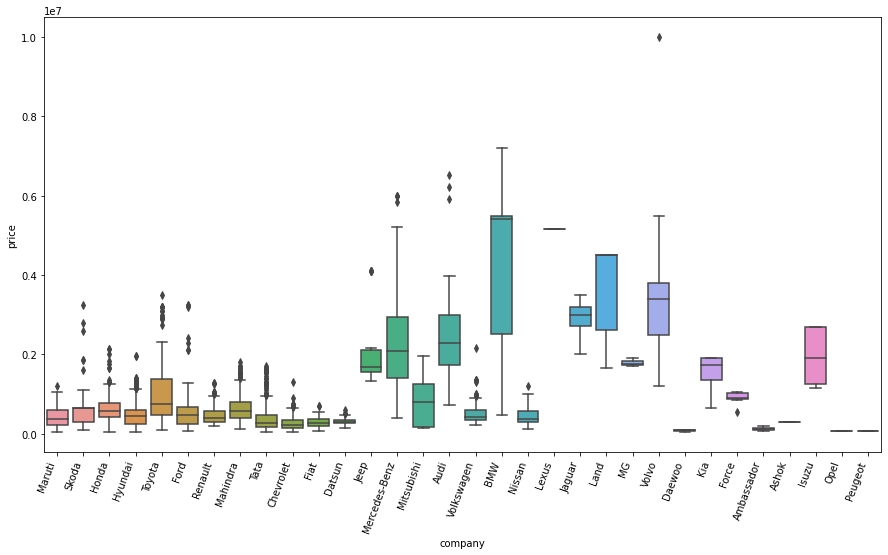

In [ ]:
# Constructing a boxplot with 'company' in the x-axis, 'price' in the y-axis using the dataframe 'cars'
plt.subplots(figsize=(15,8))
r1 = sns.boxplot(x ='company', y='price',data=cars)

# Rotate the labels in the x-axis by 70 degrees to be able to clearly read them
r1.set_xticklabels(r1.get_xticklabels(),rotation=70,ha='right')

# Display the boxplot
plt.show()

The company names like Maruti, Honda, Hyundai, etc., in the x-axis are plotted against price in the y-axis to show the price ranges of the cars corresponding to each company. The line in the middle of each box shows the median of the price of cars of that company. We can easily interpret the price range of cars manufactured by each company. For example, we can interpret from the plot that BMW has higher-priced cars than other companies.

## Relationship of km_driven with price

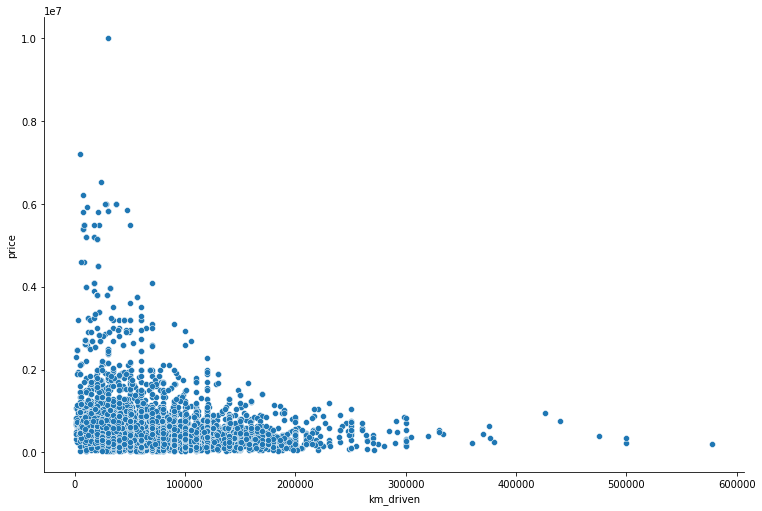

In [ ]:
# Constructing a plot with 'km_dirven' in the x-axis, 'price' in the y-axis using the dataframe 'cars'
sns.relplot(x='km_driven',y='price',data=cars,height=7,aspect=1.5)

This plot shows how the no. of kilometers that a car has been driven for influences the price at which it was sold. For example, we can interpret from the graph that cars that have been driven for 2,50,000km or more sell at low prices, whereas cars that have not been driven much at all sell at higher prices.

## Relationship of year with price

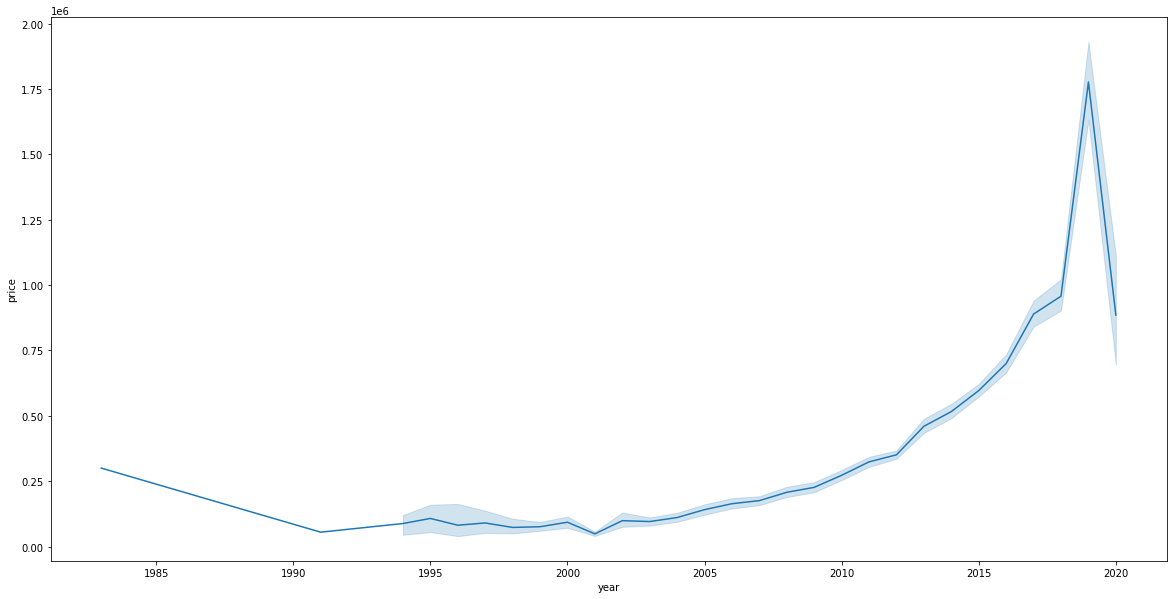

In [ ]:
# Constructing a lineplot with 'year' in the x-axis, 'price' in the y-axis using the dataframe 'cars'
plt.subplots(figsize=(20,10))
r2 = sns.lineplot(x='year', y='price', data=cars)
r2

This lineplot shows the trend of the prices of used cars over the years. We can see that prices of cars that were purchased a little after 2015 have been sold at higher prices than those before, but after a while, towards the year 2020, the prices take a steep fall.

## Relationship of fuel with price

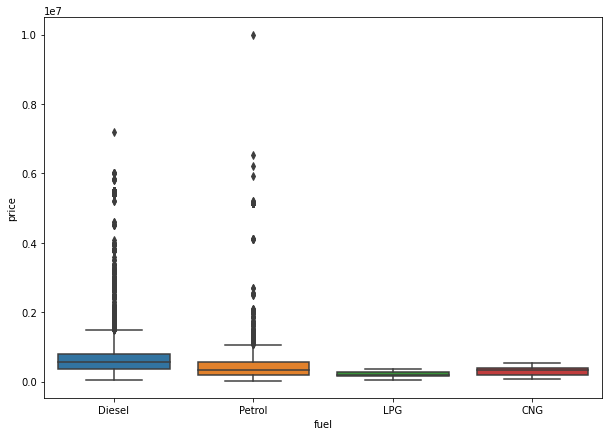

In [ ]:
# Constructing a boxplot with 'fuel' in the x-axis, 'price' in the y-axis using the dataframe 'cars'
plt.subplots(figsize=(10,7))
r4 = sns.boxplot(x='fuel',y='price',data=cars)
r4

This boxplot shows the price ranges influenced by the different fuel types like diesel, petrol, LPG, and CNG. We can easily interpret that the cars powered by diesel generally sell at higher prices than those with petrol, LPG, and CNG. LPG powered cars sell the least.

## Relationship of price with company, year, fuel

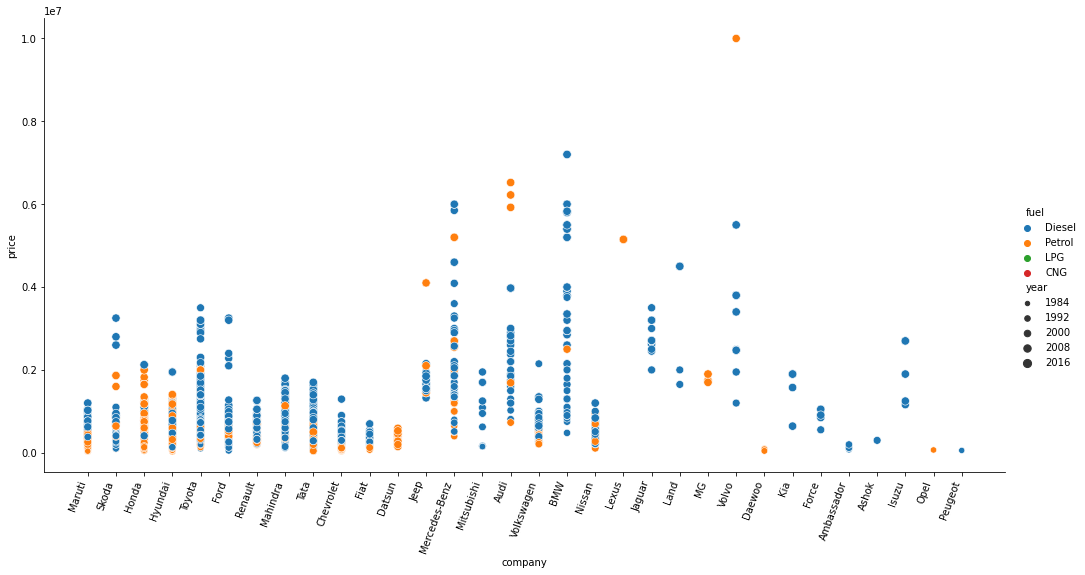

In [ ]:
# Constructing a plot to check the variation of price with respect to company, year, and fuel
r5 = sns.relplot(x='company',y='price',data=cars,hue='fuel', size='year',height=7,aspect=2)
r5.set_xticklabels(rotation=70,ha='right')
r5

## Inputs and Target
#### Inputs:
- name
- company
- year
- km_driven
- fuel

#### Output/Target:
- price

In [ ]:
# Selecting the input and target features
X = cars[['name','company','year','km_driven','fuel']]
y = cars['price']

## Train-Test Split
The train-test split is a technique for evaluating the performance of a Machine Learning Algorithm. It divides the dataset into two subsets:
- <b>Training Dataset</b> : Used to fit the model
- <b>Testing Dataset </b> : Used to test the model and predict desried output values, which are then compared with the expected values

Generally, the data is train-test split in percentages of 80-20 or 67-33. For this dataset, we have used the 80-20 train-test split.

In [ ]:
# Performing train-test split with test size as 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=490)

## One Hot Encoding
The values in the columns 'name', 'company', and 'fuel' are categorical. As this can confuse the machine learning model, the data in these columns should be encoded, either using integer encoding or using other encoding mechanisms. 

We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, but in our categorical data, no such ordinal relationship is existent.

So, we use one hot encoding for this purpose. One hot encoding allows the representation of categorical data to be more expressive. It splits the columns that contain categorical data into many columns depending on the number of categories present in those columns.

In [ ]:
# Performing One Hot Encoding on categorical data in 'name', 'company', 'fuel'
ohe = OneHotEncoder()

# Fit the encoded categorical data to the inputs for the model
ohe.fit(X[['name','company','fuel']])

# Use column transformer to selectively apply data transformation (one hot encoder here) selectively to categorical data and let other columns' data pass through as they are
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel']), remainder='passthrough')

## Model Training

A pipeline in machine learning is used to help automate machine learning workflows. They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative. The execution of the workflow is in a pipe-like manner, i.e. the output of the first steps becomes the input of the second step. Scikit-learn provides a feature for handling such pipes under the sklearn.pipeline module called Pipeline. 

In [ ]:
# Implementing linear regression with default hyperparameters
lr = LinearRegression()

# Making a pipeline
pipe = make_pipeline(column_trans,lr)

# Fitting the model with training values
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador CLASSIC 1500', 'Ambassador Classic 2000',
       'Ambassador Grand 1500', 'Ambassador Grand 2000',
       'Ashok Leyland Stile', 'Audi A3 35', 'Audi A3 40', 'Au...
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                 

## Predictions

In [ ]:
# Predicting the test dataset
y_pred = pipe.predict(X_test)

## Plotting the regression line with the values in test dataset
As mentioned earlier, a linear line showing the relationship between the dependent and independent variables is called a regression line. We can visualise this regression line for our test dataset.

<function matplotlib.pyplot.show>

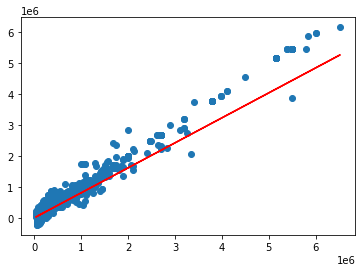

In [ ]:
# Scatter plot of testing dataset
plt.scatter(y_test, y_pred)
plt.plot(y_test, 0.8062*y_test, 'r')

# Display the plot
plt.show

## Evaluating the Model
Now that we have trained our model, we need to check how well it performs. In regression (whether linear or otherwise), because the predicted value is a continuous variable, we want to quantify how overall we mispredict the target variable. So, we use a metric called R2-score or R-square score.

R-square score is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted. It is also known as the coefficient of determination.

R-square score is a comparison of residual sum of squares (SSres) with total sum of squares(SStot). Residual sum of squares in calculated by the summation of squares of perpendicular distance between data points and the best fitted line. Total sum of squares is calculated by summation of squares of perpendicular distance between data points and the average line. R2-score is calculated using the following formula:<br>
<br>

<center><font size="5">$R2 = 1 - SS(res) / SS(tot)$</center>

In [ ]:
# Calculating R2 score
r2_score(y_test,y_pred)

0.9767932315714218

The R2-score obtained is 0.97, almost close to the ideal value for r2-score (i.e.), 1. This shows that our regression model fits extremely well for the data. 

## New input and output to test the predictive ability of the model
### Input format: As given below

In [ ]:
name = input("Enter the model of the car: ")

Enter the model of the car: Maruti Swift VXI


In [ ]:
company = input("Enter the company: ")

Enter the company: Maruti


In [ ]:
year = int(input("Enter the year in which the car was purchased: "))

Enter the year in which the car was purchased: 2010


In [ ]:
kms_driven = int(input("Enter the number of kilometers driven: "))

Enter the number of kilometers driven: 52000


In [ ]:
fuel_type = input("Enter the fuel type: ")

Enter the fuel type: Petrol


### Output

In [ ]:
#predicting the car price for the given user input
price_pred = pipe.predict(pd.DataFrame(columns=['name','company','year','km_driven','fuel'],data=np.array([name,company,year,kms_driven,fuel_type]).reshape(1,5)))
#price_pred = price_pred.astype(float)
print("-------------------------------------------------")
print("Model             : ",name)
print("Company           : ",company)
print("Year              : ",year)
print("Kilometers driven : ",kms_driven)
print("Fuel type         : ",fuel_type)
print("Predicted Price   :  Rs.",round(price_pred[0],2))
print("-------------------------------------------------")

NameError: ignored